# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import pyplot as plt
from scipy import linalg


warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [2]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

In [3]:
c = x + 2*y + 3*z
c

array([5, 7])

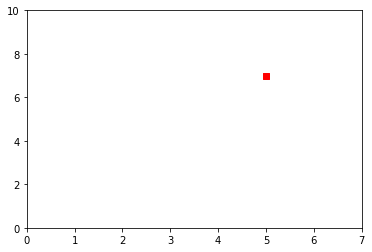

In [10]:
ax = plt.axes()

plt.xlim( [0, 7] )
plt.ylim( [0, 10] )

ax.scatter(c[0], c[1], c='r', marker='s')

plt.show()

In [ ]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

ax.plot([0,x[0]], [0,x[1]])
ax.plot([0,y[0]], [0,y[1]])
ax.plot([0,z[0]], [0,z[1]])

ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_zlabel('z')

ax.legend(['x', 'y'])

plt.show()

In [67]:
# длины векторов
xLength = np.linalg.norm( x )
yLength = np.linalg.norm( y )
zLength = np.linalg.norm( z )

print('длина вектора x:', xLength)
print('длина вектора y:', yLength)
print('длина вектора z:', zLength)

print('Угол между векторами x, y:', np.dot( x, y ) / ( xLength * yLength ))
print('Угол между векторами x, z:',np.dot( x, z ) / ( xLength * zLength ))

длина вектора x: 1.4142135623730951
длина вектора y: 2.0
длина вектора z: 2.0
Угол между векторами x, y: 0.7071067811865475
Угол между векторами x, z: 0.7071067811865475


## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [11]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

In [12]:
df

,type,x,y,z
21,v,-0.392414,0.045288,0.025403
20,v,-0.283883,0.219551,-0.024912
19,v,-0.163721,0.476657,-0.030335
18,v,-0.163721,0.476657,-0.030335
17,v,-0.163721,0.476657,-0.030335
7,v,-0.105431,-0.412672,-0.015059
8,v,-0.103304,-0.748699,-0.045038
22,v,-0.093564,-0.046249,-0.012199
5,v,-0.093564,-0.046249,-0.012199
6,v,-0.093564,-0.046249,-0.012199


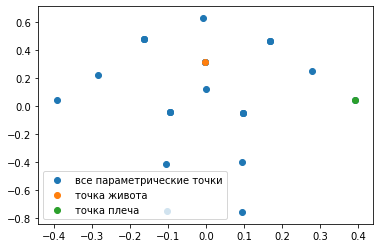

In [20]:
plt.scatter(df.x, df.y)
plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[16], df.y[16])
plt.legend(['все параметрические точки', 'точка живота', 'точка кисти'])

Спроецируем точку кисти на вектор позвоночника

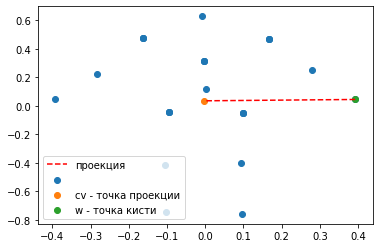

In [13]:
# вектор v - вектор позвоночника (составлен как разность одного вектора из другого)
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
# вектор w - вектор кисти
w = np.array([df.x[16],df.y[16]])

# строим проекцию данной точки w на вектор v: cv
cv = np.array(df.x[9], df.y[9]) + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

# линия между v и cv
plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', '', 'cv - точка проекции', 'w - точка кисти'])

Расстояние от точки кисти до позвоночника - модуль вектора, образованного разностью двух точек: cv и w.

In [16]:
linalg.norm(cv - w)

0.3945363610739645

# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [31]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [34]:
from numpy import linalg as LA
e_vals, e_vecs = LA.eig(m1)
print('Собственные вектора матрицы m1: \n', e_vecs)
print('Собственные значения m1: ', e_vals)

Собственные вектора матрицы m1: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения m1:  [1. 4.]


In [35]:
e_vals, e_vecs = LA.eig(m2)
print('Собственные вектора матрицы m2: \n', e_vecs)
print('Собственные значения m2: ', e_vals)

Собственные вектора матрицы m2: 
 [[-0.57735027 -0.81649658  0.15430335]
 [-0.57735027  0.40824829  0.6172134 ]
 [ 0.57735027 -0.40824829  0.77151675]]
Собственные значения m2:  [6. 3. 3.]
